# 1. Import libraries

In [1]:
# data manipulation and plotting tools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# data processing
from category_encoders.one_hot import OneHotEncoder
from category_encoders.ordinal import OrdinalEncoder
from category_encoders.target_encoder import TargetEncoder
from sklearn.preprocessing import MinMaxScaler, RobustScaler,LabelEncoder

# algorithms
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# model selection tools
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# metrics
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# explainability
import shap

#visual
import seaborn as sns

from scipy.stats import chi2_contingency

#MostrarMas
pd.set_option('display.max_columns', None)

# 2. Load the dataset

In [2]:
data = pd.read_csv('churn.csv')

In [3]:
data.head()


,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,City,Zip Code,Latitude,Longitude,Population,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,Los Angeles,90022,34.023810,-118.156582,68701,Q3,No,0,1,NaN,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,Los Angeles,90063,34.044271,-118.185237,55668,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,Los Angeles,90065,34.108833,-118.229715,47534,Q3,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,52,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,Inglewood,90303,33.936291,-118.332639,27778,Q3,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,12,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,Whittier,90602,33.972119,-118.020188,26265,Q3,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Fiber Optic,14,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Under 30                           7043 non-null   object 
 4   Senior Citizen                     7043 non-null   object 
 5   Married                            7043 non-null   object 
 6   Dependents                         7043 non-null   object 
 7   Number of Dependents               7043 non-null   int64  
 8   Country                            7043 non-null   object 
 9   State                              7043 non-null   object 
 10  City                               7043 non-null   object 
 11  Zip Code                           7043 non-null   int64

# 3. Data Splitting

In [5]:
#X_trainin, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Exploratory Data Analysis

In [6]:
# Your code here. Exploratory data analysis can be done before splitting, but do not transform the dataset before splitting.
data.info() #No valores nulos 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Under 30                           7043 non-null   object 
 4   Senior Citizen                     7043 non-null   object 
 5   Married                            7043 non-null   object 
 6   Dependents                         7043 non-null   object 
 7   Number of Dependents               7043 non-null   int64  
 8   Country                            7043 non-null   object 
 9   State                              7043 non-null   object 
 10  City                               7043 non-null   object 
 11  Zip Code                           7043 non-null   int64

In [7]:
missing_percentage_Offer = (data['Offer'].isnull().sum() / len(data)) * 100
print(f"Porcentaje de valores faltantes en la columna 'Offer': {missing_percentage_Offer:.2f}%")

Porcentaje de valores faltantes en la columna 'Offer': 55.05%


In [8]:
missing_percentage_Internet_Type = (data['Internet Type'].isnull().sum() / len(data)) * 100
print(f"Porcentaje de valores faltantes en la columna 'Internet Type': {missing_percentage_Internet_Type:.2f}%")

Porcentaje de valores faltantes en la columna 'Internet Type': 21.67%


In [9]:
#Estructura de los datos y resumen:  El dataset original tiene 50 columnas,
#con variables de datos demográficos, geográficas, con información sobre los servicios,
#datos financieros, y satisfacción y comportamiento del cliente.
#Análisis de datos faltantes: Las siguientes columnas tienen valores faltantes:  Offer (55,05%)  e Internet Type (21,67%) 
#Esta información está relacionada con los clientes que se han dado de baja, y se van a ir evaluando a medida que 
#se realice el estudio del dataset

#### Estudio edades

In [10]:
mean_age = data['Age'].mean()
print(f"La media de la edad es: {mean_age}")

La media de la edad es: 46.50972596904728


C:\Users\micha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


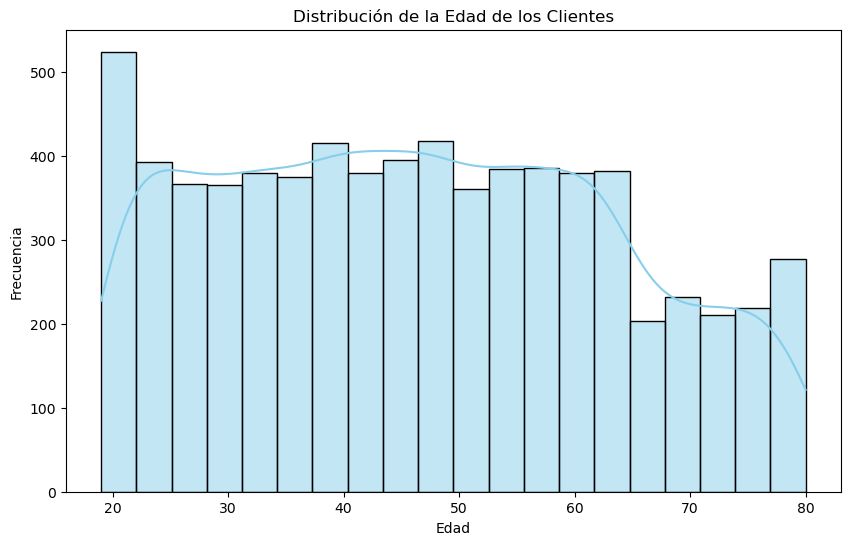

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribución de la Edad de los Clientes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

In [12]:
mean_age = data['Age'].mean()
print(f"La media de la edad es: {mean_age}")

La media de la edad es: 46.50972596904728


In [13]:
#Los rangos de edad están desde los 19 a 80 años, siendo la media alrededor de los 46.50 años

C:\Users\micha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


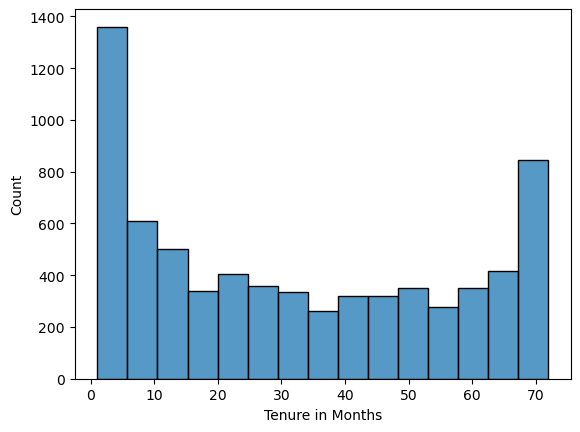

In [14]:
sns.histplot(data['Tenure in Months'])
plt.show()

In [15]:
data['Tenure in Months'].describe()

count    7043.000000
mean       32.386767
std        24.542061
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: Tenure in Months, dtype: float64

C:\Users\micha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


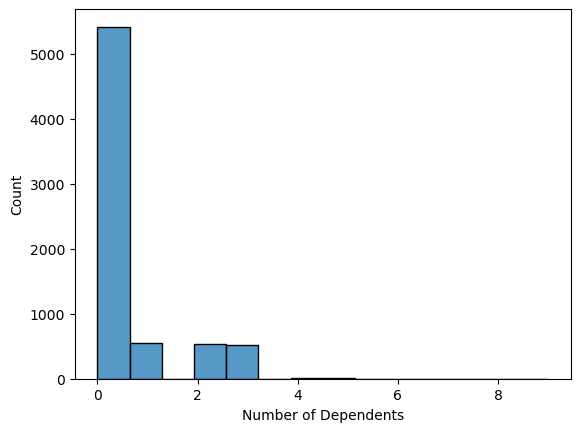

In [16]:
sns.histplot(data["Number of Dependents"])
plt.show()


In [17]:
data["Multiple Lines"].value_counts(normalize=True)

Multiple Lines
No     0.578163
Yes    0.421837
Name: proportion, dtype: float64

In [18]:
# Crear tabla de contingencia
tabla_contingencia_multiple_lines = pd.crosstab(data['Multiple Lines'], data['Churn Label'])

# Aplicar la prueba Chi-cuadrado
chi2_multiple_lines, p_multiple_lines, dof_multiple_lines, expected_multiple_lines = chi2_contingency(tabla_contingencia_multiple_lines)

# Calcular el índice de Cramér
n_multiple_lines = data.shape[0]  # número de observaciones
cramer_v_multiple_lines = np.sqrt(chi2_multiple_lines / (n_multiple_lines * (min(tabla_contingencia_multiple_lines.shape) - 1)))

# Mostrar resultados
print(f"Chi-cuadrado: {chi2_multiple_lines}")
print(f"Valor p: {p_multiple_lines}")
print(f"Índice de Cramér: {cramer_v_multiple_lines}")


Chi-cuadrado: 11.143251001456251
Valor p: 0.0008433795342472428
Índice de Cramér: 0.03977655002347514


In [19]:
data["Satisfaction Score"].value_counts()

Satisfaction Score
3    2665
4    1789
5    1149
1     922
2     518
Name: count, dtype: int64

In [20]:
data.groupby("Satisfaction Score")["Churn Label"].value_counts(normalize=True)

##Relevante, vale la pena hacer feature Engineering

Satisfaction Score  Churn Label
1                   Yes            1.000000
2                   Yes            1.000000
3                   No             0.839024
                    Yes            0.160976
4                   No             1.000000
5                   No             1.000000
Name: proportion, dtype: float64

In [21]:
data["Customer Status"].value_counts

<bound method IndexOpsMixin.value_counts of 0       Churned
1       Churned
2       Churned
3       Churned
4       Churned
         ...   
7038     Stayed
7039     Stayed
7040     Stayed
7041     Stayed
7042     Stayed
Name: Customer Status, Length: 7043, dtype: object>

In [22]:
data["Customer Status"].value_counts(normalize="True")

Customer Status
Stayed     0.670169
Churned    0.265370
Joined     0.064461
Name: proportion, dtype: float64

In [23]:
data["Churn Label"].value_counts(normalize="True")

Churn Label
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

In [24]:
data["Payment Method"].value_counts(normalize=True) ##Mas de la mitad son por Bank

Payment Method
Bank Withdrawal    0.555019
Credit Card        0.390317
Mailed Check       0.054664
Name: proportion, dtype: float64

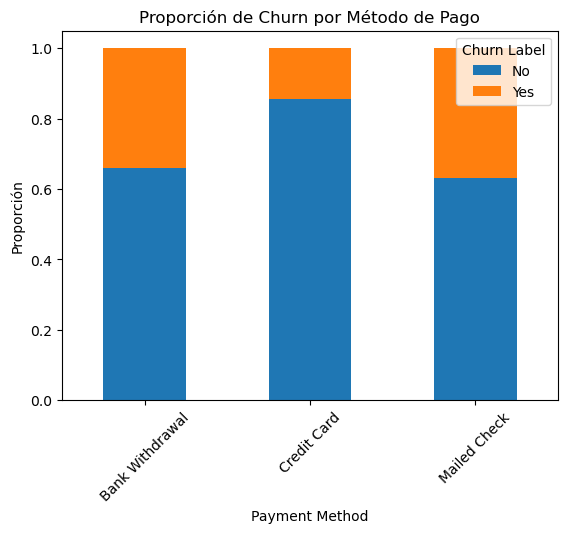

In [25]:
# Crear el DataFrame a partir de tus datos
data_frame = {'Payment Method': ['Bank Withdrawal', 'Bank Withdrawal', 'Credit Card', 'Credit Card', 'Mailed Check', 'Mailed Check'],
        'Churn Label': ['No', 'Yes', 'No', 'Yes', 'No', 'Yes'],
        'Proportion': [0.660015, 0.339985, 0.855220, 0.144780, 0.631169, 0.368831]}

df = pd.DataFrame(data_frame)

# Pivotar la tabla para que Churn Label sea la columna
pivot_df = df.pivot(index='Payment Method', columns='Churn Label', values='Proportion')

# Graficar barras apiladas
pivot_df.plot(kind='bar', stacked=True)

plt.title('Proporción de Churn por Método de Pago')
plt.ylabel('Proporción')
plt.xticks(rotation=45)
plt.show()

In [26]:
data[(data["Total Refunds"]!=0) & (data["Churn Label"]=="Yes")] ## Ver cuan relacionado esta que haya reembolsos con el churn

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,City,Zip Code,Latitude,Longitude,Population,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,Los Angeles,90065,34.108833,-118.229715,47534,Q3,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,52,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,Inglewood,90303,33.936291,-118.332639,27778,Q3,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,12,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
7,3445-HXXGF,Male,66,No,Yes,Yes,No,0,United States,California,Sierra Madre,91024,34.168686,-118.057505,10558,Q3,Yes,6,58,Offer B,No,0.00,No,Yes,DSL,24,No,Yes,Yes,No,No,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,45.30,2651.20,40.95,0,0.00,2610.25,1,Churned,Yes,91,5444,Dissatisfaction,Service dissatisfaction
9,2070-FNEXE,Female,77,No,Yes,No,Yes,2,United States,California,Pasadena,91107,34.159007,-118.087353,32369,Q3,No,0,7,Offer E,Yes,26.95,No,Yes,Fiber Optic,18,Yes,No,No,No,No,No,No,No,Month-to-Month,No,Bank Withdrawal,76.45,503.60,11.05,0,188.65,681.20,2,Churned,Yes,81,4419,Price,Lack of affordable download/upload speed
111,7156-MHUGY,Male,68,No,Yes,No,No,0,United States,California,Buena Park,90621,33.874224,-117.993368,33528,Q3,No,0,13,NaN,Yes,26.11,No,Yes,Fiber Optic,4,No,No,No,No,Yes,Yes,Yes,No,Month-to-Month,Yes,Bank Withdrawal,90.50,1201.15,29.84,140,339.43,1650.74,1,Churned,Yes,76,5394,Competitor,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2394,2869-ADAWR,Female,41,No,No,No,No,0,United States,California,Sutter Creek,95685,38.432145,-120.770690,4610,Q3,No,0,45,Offer B,Yes,14.12,Yes,Yes,Fiber Optic,24,No,Yes,No,No,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,89.30,4016.85,44.63,0,635.40,4607.62,2,Churned,Yes,90,4880,Dissatisfaction,Poor expertise of online support
2397,0637-UBJRP,Male,40,No,No,Yes,No,0,United States,California,Wilton,95693,38.392559,-121.225093,5889,Q3,Yes,5,13,Offer D,Yes,29.92,No,Yes,Fiber Optic,21,Yes,No,No,No,No,Yes,Yes,Yes,Month-to-Month,No,Bank Withdrawal,84.05,1095.30,23.97,0,388.96,1460.29,1,Churned,Yes,77,4745,Competitor,Competitor offered higher download speeds
2398,0940-OUQEC,Male,54,No,No,No,No,0,United States,California,Winters,95694,38.578604,-122.024579,8406,Q3,No,0,10,Offer D,Yes,17.07,Yes,Yes,Fiber Optic,3,No,Yes,No,No,No,No,No,No,Month-to-Month,Yes,Bank Withdrawal,80.70,788.80,38.42,50,170.70,971.08,1,Churned,Yes,77,3492,Competitor,Competitor offered more data
2399,0702-PGIBZ,Male,28,Yes,No,No,No,0,United States,California,Dutch Flat,95714,39.197215,-120.836790,350,Q3,No,0,4,Offer E,Yes,26.16,Yes,Yes,Fiber Optic,85,No,Yes,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,101.70,364.55,1.48,0,104.64,467.71,2,Churned,Yes,91,2777,Competitor,Competitor made better offer


In [27]:
value_counts = data["Total Extra Data Charges"].value_counts()

# Convierte el resultado de value_counts a un DataFrame para facilitar la visualización
df = value_counts.reset_index()
df.columns = ['Total Extra Data Charges', 'Count']
df

,Total Extra Data Charges,Count
0,0,6315
1,10,138
2,40,62
3,30,58
4,20,51
5,80,47
6,100,44
7,50,43
8,150,42
9,130,40


#### Estudio breve 

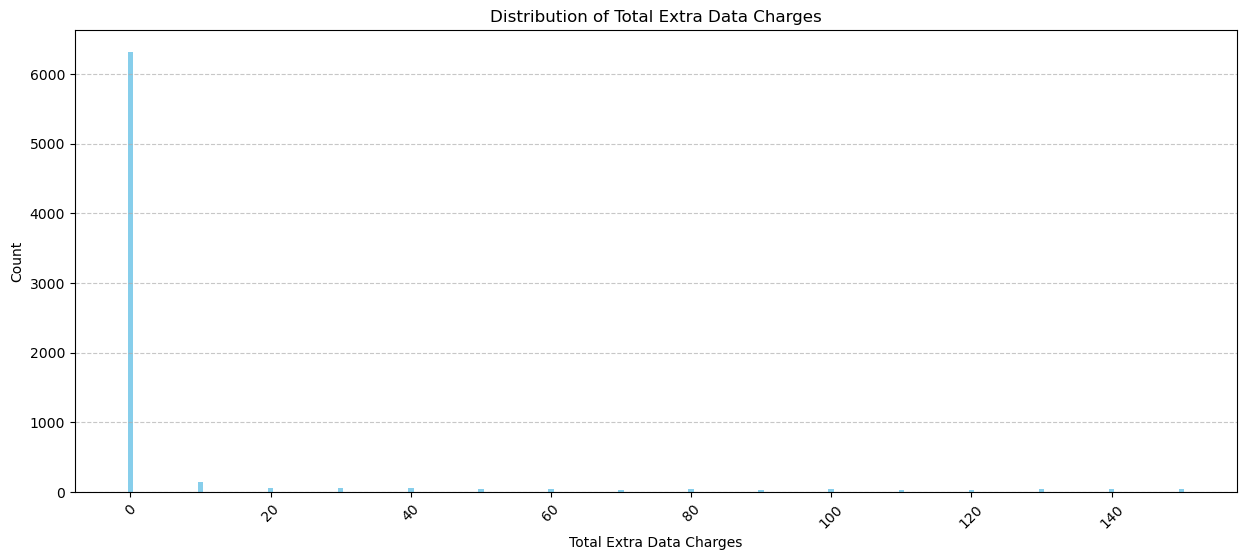

In [28]:
plt.figure(figsize=(15, 6))  # Ajusta el valor 15 para hacerla aún más ancha si lo necesitas
plt.bar(df['Total Extra Data Charges'], df['Count'], color='skyblue')
plt.xlabel('Total Extra Data Charges')
plt.ylabel('Count')
plt.title('Distribution of Total Extra Data Charges')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


C:\Users\micha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


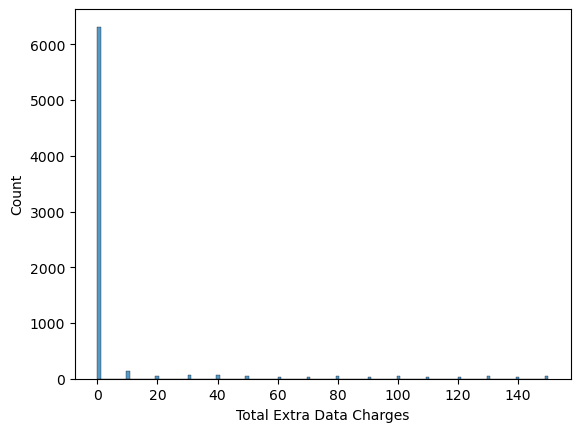

In [29]:
sns.histplot(data["Total Extra Data Charges"], bins=140)
plt.show()

C:\Users\micha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


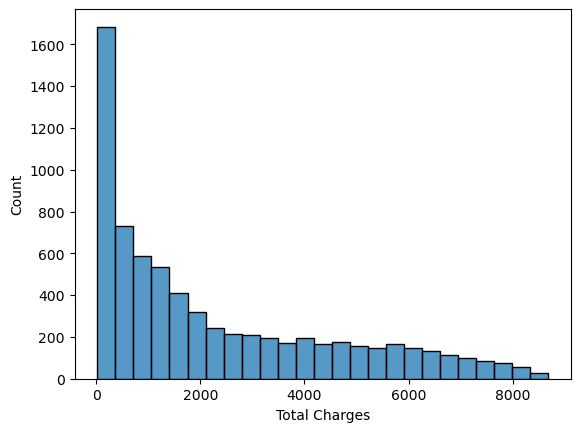

In [30]:
sns.histplot(data['Total Charges'])
plt.show()

C:\Users\micha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


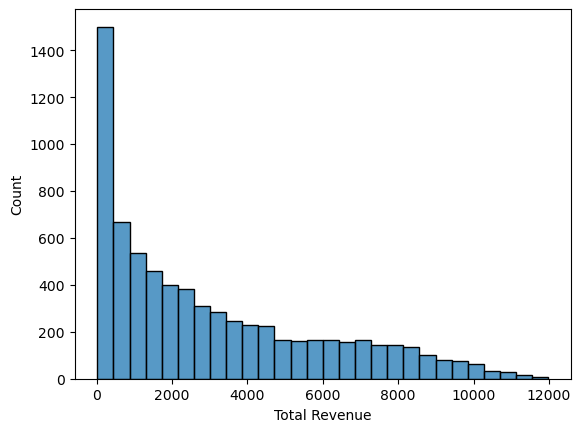

In [31]:
sns.histplot(data['Total Revenue'])
plt.show()

In [32]:
data["Referred a Friend"].value_counts()

Referred a Friend
No     3821
Yes    3222
Name: count, dtype: int64

C:\Users\micha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


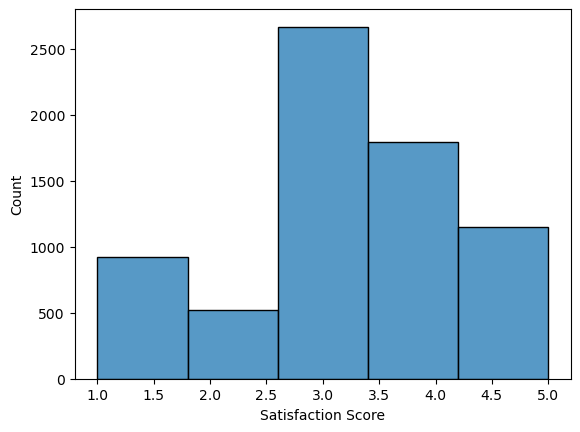

In [33]:
sns.histplot(data['Satisfaction Score'],bins = 5) ## por lo general es una satisfaccion alta
plt.show()

In [34]:
data["Premium Tech Support"].value_counts()

Premium Tech Support
No     4999
Yes    2044
Name: count, dtype: int64

In [35]:
contingency_table = pd.crosstab(data['Premium Tech Support'], data['Churn Label'])
print(contingency_table)

Churn Label             No   Yes
Premium Tech Support            
No                    3440  1559
Yes                   1734   310


In [36]:
data['Country'].value_counts()

Country
United States    7043
Name: count, dtype: int64

In [37]:
columns_to_analyze = [
    'Offer', 
    'Phone Service', 
    'Avg Monthly Long Distance Charges', 
    'Multiple Lines', 
    'Internet Service', 
    'Avg Monthly GB Download', 
    'Online Security'
]

In [38]:
filtered_data = data[columns_to_analyze]

In [39]:
filtered_data_summary = filtered_data.describe(include='all')

filtered_data_summary

,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Avg Monthly GB Download,Online Security
count,3166,7043,7043.000000,7043,7043,7043.000000,7043
unique,5,2,NaN,2,2,NaN,2
top,Offer B,Yes,NaN,No,Yes,NaN,No
freq,824,6361,NaN,4072,5517,NaN,5024
mean,NaN,NaN,22.958954,NaN,NaN,20.515405,NaN
std,NaN,NaN,15.448113,NaN,NaN,20.418940,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN
25%,NaN,NaN,9.210000,NaN,NaN,3.000000,NaN
50%,NaN,NaN,22.890000,NaN,NaN,17.000000,NaN
75%,NaN,NaN,36.395000,NaN,NaN,27.000000,NaN


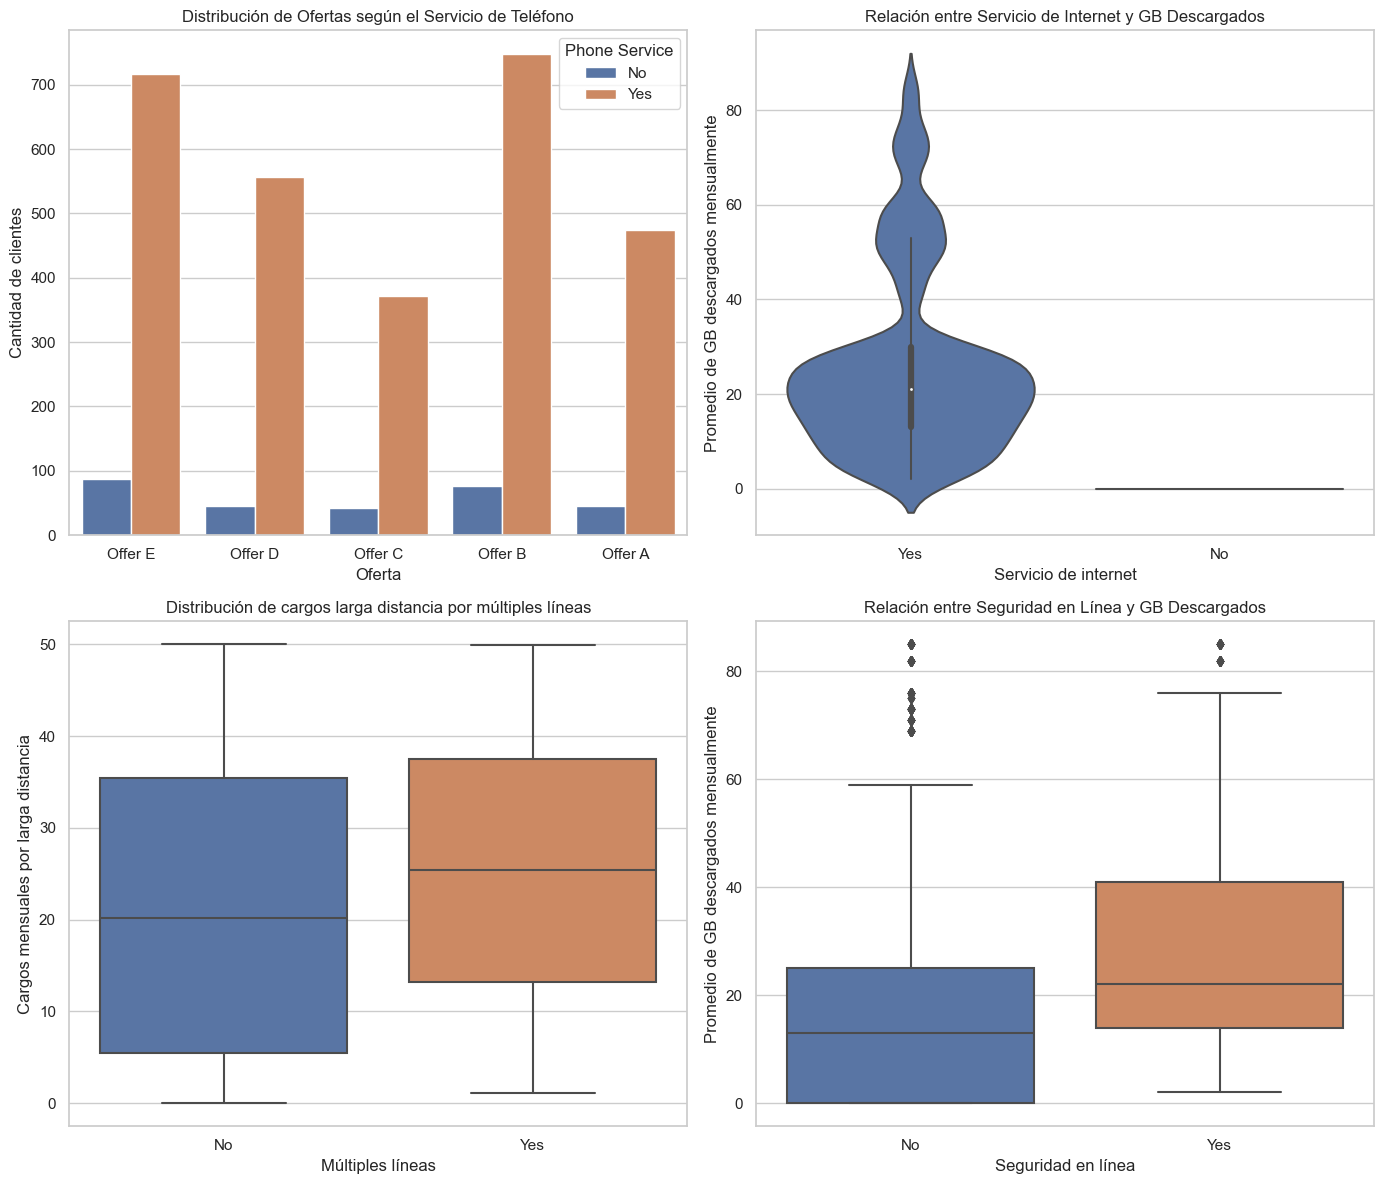

In [40]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
# 1. Gráfico de barras para Offer y Phone Service
sns.countplot(ax=axes[0, 0], data=filtered_data, x='Offer', hue='Phone Service')
axes[0, 0].set_title('Distribución de Ofertas según el Servicio de Teléfono')
axes[0, 0].set_ylabel('Cantidad de clientes')
axes[0, 0].set_xlabel('Oferta')

# 2. Gráfico de violín para Internet Service y Avg Monthly GB Download
sns.violinplot(ax=axes[0, 1], data=filtered_data, x='Internet Service', y='Avg Monthly GB Download')
axes[0, 1].set_title('Relación entre Servicio de Internet y GB Descargados')
axes[0, 1].set_ylabel('Promedio de GB descargados mensualmente')
axes[0, 1].set_xlabel('Servicio de internet')

# 3. Gráfico de dispersión para Avg Monthly Long Distance Charges y Multiple Lines
sns.boxplot(ax=axes[1, 0], data=filtered_data, x='Multiple Lines', y='Avg Monthly Long Distance Charges')
axes[1, 0].set_title('Distribución de cargos larga distancia por múltiples líneas')
axes[1, 0].set_ylabel('Cargos mensuales por larga distancia')
axes[1, 0].set_xlabel('Múltiples líneas')

# 4. Gráfico de caja para Online Security y Avg Monthly GB Download
sns.boxplot(ax=axes[1, 1], data=filtered_data, x='Online Security', y='Avg Monthly GB Download')
axes[1, 1].set_title('Relación entre Seguridad en Línea y GB Descargados')
axes[1, 1].set_ylabel('Promedio de GB descargados mensualmente')
axes[1, 1].set_xlabel('Seguridad en línea')

plt.tight_layout()
plt.show()

In [41]:
# 1
# Distribución de Ofertas según el Servicio de Teléfono: 
# La mayoría de los clientes no tienen ninguna oferta activa ("None")
# para quienes tienen servicio de teléfono como para los que no lo tienen
# los clientes con servicio de teléfono son más en todas las categorías de oferta
# 2
# Relación entre el Servicio de Internet y los GB Descargados: 
# Los clientes con servicio de internet muestran una amplia distribución en la cantidad de GB descargados por mes
# la mediana está en 17 GB
# los que no tienen servicio de internet muestran valores cercanos a 0 GB
# 3
# Distribución de Cargos de Larga Distancia por Múltiples Líneas: 
# Los clientes con múltiples líneas suelen tener cargos de larga distancia un poco más altos 
# comparando con los que no tienen múltiples líneas
# los cargos están bien distribuidos en las categorías
# 4
# Relación entre Seguridad en Línea y GB Descargados: 
# Los clientes que no tienen seguridad en línea tienden a descargar más GB mensualmente en comparación con los que sí 
# los clientes que buscan mayor seguridad en línea no utilizan tanto la capacidad de internet

#### Estudio de correlacion

In [42]:
numerical_columns = ['Age', 'Number of Dependents',
       'Population', 'Number of Referrals', 'Tenure in Months',
       'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download',
       'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score',
       ]

<Axes: >

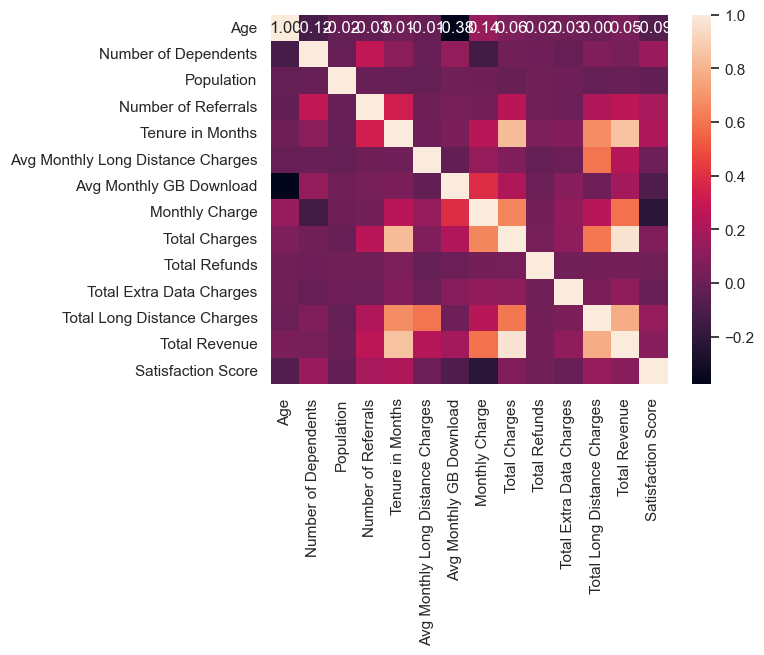

In [43]:
#corr calcula coeficiente de correlacion de pearson, y solo toma las numericas
sns.heatmap(data[numerical_columns].corr(), annot=True, fmt=".2f")

# 5. Data Processing

## Data Cleaning

In [44]:
# Your code here
data.info()
ColumnsDrop=["Customer ID","Under 30","Senior Citizen","Country","State","City","Latitude","Longitude","Quarter","Churn Category","Churn Score","CLTV","Churn Reason","Customer Status"]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Under 30                           7043 non-null   object 
 4   Senior Citizen                     7043 non-null   object 
 5   Married                            7043 non-null   object 
 6   Dependents                         7043 non-null   object 
 7   Number of Dependents               7043 non-null   int64  
 8   Country                            7043 non-null   object 
 9   State                              7043 non-null   object 
 10  City                               7043 non-null   object 
 11  Zip Code                           7043 non-null   int64

In [45]:
data = data.drop(ColumnsDrop,axis=1)

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 36 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   object 
 1   Age                                7043 non-null   int64  
 2   Married                            7043 non-null   object 
 3   Dependents                         7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   Zip Code                           7043 non-null   int64  
 6   Population                         7043 non-null   int64  
 7   Referred a Friend                  7043 non-null   object 
 8   Number of Referrals                7043 non-null   int64  
 9   Tenure in Months                   7043 non-null   int64  
 10  Offer                              3166 non-null   object 
 11  Phone Service                      7043 non-null   objec

In [47]:
data["Contract"].value_counts()

Contract
Month-to-Month    3610
Two Year          1883
One Year          1550
Name: count, dtype: int64

In [48]:
 ## Limpiar los datos Internet Type, offer
data["Internet Type"].value_counts()

Internet Type
Fiber Optic    3035
DSL            1652
Cable           830
Name: count, dtype: int64

In [49]:
data["Internet Type"].isnull().sum()

1526

In [50]:
data[(data["Internet Type"].isnull())&((data["Internet Service"]==0))]

,Gender,Age,Married,Dependents,Number of Dependents,Zip Code,Population,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Churn Label


In [51]:
data['Internet Type'] = data['Internet Type'].fillna("No Internet")
data["Internet Type"].isnull().sum()

0

In [52]:
data["Offer"].value_counts()

Offer
Offer B    824
Offer E    805
Offer D    602
Offer A    520
Offer C    415
Name: count, dtype: int64

In [53]:
data["Offer"].isnull().sum()

3877

In [54]:
data['Offer'] = data['Offer'].fillna("No Offer")

In [55]:
data["Offer"].isnull().sum()

0

In [56]:
data.info()## No nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 36 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   object 
 1   Age                                7043 non-null   int64  
 2   Married                            7043 non-null   object 
 3   Dependents                         7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   Zip Code                           7043 non-null   int64  
 6   Population                         7043 non-null   int64  
 7   Referred a Friend                  7043 non-null   object 
 8   Number of Referrals                7043 non-null   int64  
 9   Tenure in Months                   7043 non-null   int64  
 10  Offer                              7043 non-null   object 
 11  Phone Service                      7043 non-null   objec

## Re-sampling (if needed)

In [57]:

data["Churn Label"].value_counts(normalize=True)
##No necesario el re-sampling
## Hay suficientos datos para que el programa aprenda


Churn Label
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

## Feature Engineering

In [58]:
# Your code here
data["Age_cuartiles"] = pd.qcut(data['Age'], q=4)
data["Age_cuartiles"].value_counts()

Age_cuartiles
(32.0, 46.0]      1821
(46.0, 60.0]      1790
(18.999, 32.0]    1770
(60.0, 80.0]      1662
Name: count, dtype: int64

In [59]:
# Agrupar por los cuartiles de edad y contar los valores normalizados (proporciones) de "Churn Label"
proporciones = data.groupby("Age_cuartiles")["Churn Label"].value_counts(normalize=True)

# Mostrar el resultado
print(proporciones)

## Los grupos mayores son mas propensos a caer en churn

Age_cuartiles   Churn Label
(18.999, 32.0]  No             0.775141
                Yes            0.224859
(32.0, 46.0]    No             0.763317
                Yes            0.236683
(46.0, 60.0]    No             0.757542
                Yes            0.242458
(60.0, 80.0]    No             0.635379
                Yes            0.364621
Name: proportion, dtype: float64


C:\Users\micha\AppData\Local\Temp\ipykernel_21440\1589408908.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proporciones = data.groupby("Age_cuartiles")["Churn Label"].value_counts(normalize=True)


In [60]:
# Crear una nueva columna categórica para los niveles de satisfacción
data['Satisfaction_Level'] = pd.cut(data['Satisfaction Score'], 
                                    bins=[0, 2, 3, 5],  # Límites de los grupos
                                    labels=['Baja', 'Media', 'Alta'])  # Nombres de los grupos

# Ver el resultado agrupado
print(data.groupby('Satisfaction_Level')["Churn Label"].value_counts(normalize=True))

Satisfaction_Level  Churn Label
Baja                Yes            1.000000
                    No             0.000000
Media               No             0.839024
                    Yes            0.160976
Alta                No             1.000000
                    Yes            0.000000
Name: proportion, dtype: float64


C:\Users\micha\AppData\Local\Temp\ipykernel_21440\645799376.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(data.groupby('Satisfaction_Level')["Churn Label"].value_counts(normalize=True))


In [61]:
# Crear una tabla de contingencia entre los niveles de satisfacción y el churn
tabla_contingencia_satisfaction = pd.crosstab(data['Satisfaction_Level'], data['Churn Label'])

# Aplicar la prueba Chi-cuadrado
chi2_satisfaction, p_satisfaction, dof_satisfaction, expected_satisfaction = chi2_contingency(tabla_contingencia_satisfaction)

# Calcular el índice de Cramér
n_satisfaction = data.shape[0]  # número de observaciones
cramer_v_satisfaction = np.sqrt(chi2_satisfaction / (n_satisfaction * (min(tabla_contingencia_satisfaction.shape) - 1)))

# Mostrar resultados
print(f"Chi-cuadrado: {chi2_satisfaction}")
print(f"Valor p: {p_satisfaction}")
print(f"Índice de Cramér: {cramer_v_satisfaction}")


Chi-cuadrado: 5196.660635558484
Valor p: 0.0
Índice de Cramér: 0.8589805576402029


In [62]:
##ANALISIS DE CORRELACION ENTRE SATISFACTION LEVEL Y CHURN LABEL

## Encoding

In [63]:
labelEncoderColumns = ["Paperless Billing","Churn Label","Gender","Married","Dependents","Referred a Friend","Phone Service","Multiple Lines","Internet Service","Online Security","Online Backup","Device Protection Plan","Premium Tech Support","Streaming TV","Streaming Movies","Streaming Music","Unlimited Data"]
OneHotEncoderColumns = ["Offer","Internet Type","Contract","Payment Method"]
OrdinalEncoderColumns = ["Age_cuartiles","Satisfaction_Level"]
#Offer,Internet Type,Contract,Payment Method


In [64]:
label_encoder = LabelEncoder()

In [65]:
for col in labelEncoderColumns:
    data[col] = label_encoder.fit_transform(data[col])


In [66]:
print(label_encoder.classes_)

['No' 'Yes']


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Gender                             7043 non-null   int32   
 1   Age                                7043 non-null   int64   
 2   Married                            7043 non-null   int32   
 3   Dependents                         7043 non-null   int32   
 4   Number of Dependents               7043 non-null   int64   
 5   Zip Code                           7043 non-null   int64   
 6   Population                         7043 non-null   int64   
 7   Referred a Friend                  7043 non-null   int32   
 8   Number of Referrals                7043 non-null   int64   
 9   Tenure in Months                   7043 non-null   int64   
 10  Offer                              7043 non-null   object  
 11  Phone Service                      7043 non

In [68]:
oh_encoder = OneHotEncoder(cols = OneHotEncoderColumns, use_cat_names=True)

In [69]:
oh_encoder.fit(data)

OneHotEncoder(cols=['Offer', 'Internet Type', 'Contract', 'Payment Method'],
              use_cat_names=True)

In [70]:
data = oh_encoder.transform(data)

In [71]:
data.columns

Index(['Gender', 'Age', 'Married', 'Dependents', 'Number of Dependents',
       'Zip Code', 'Population', 'Referred a Friend', 'Number of Referrals',
       'Tenure in Months', 'Offer_No Offer', 'Offer_Offer E', 'Offer_Offer D',
       'Offer_Offer C', 'Offer_Offer B', 'Offer_Offer A', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type_DSL', 'Internet Type_Fiber Optic',
       'Internet Type_Cable', 'Internet Type_No Internet',
       'Avg Monthly GB Download', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data',
       'Contract_Month-to-Month', 'Contract_One Year', 'Contract_Two Year',
       'Paperless Billing', 'Payment Method_Bank Withdrawal',
       'Payment Method_Credit Card', 'Payment Method_Mailed Check',
       'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data C

In [72]:
data.info()

columnas = ["Gender","Age","Married","Number of Dependents","Referred a Friend","Tenure in Months"]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Gender                             7043 non-null   int32   
 1   Age                                7043 non-null   int64   
 2   Married                            7043 non-null   int32   
 3   Dependents                         7043 non-null   int32   
 4   Number of Dependents               7043 non-null   int64   
 5   Zip Code                           7043 non-null   int64   
 6   Population                         7043 non-null   int64   
 7   Referred a Friend                  7043 non-null   int32   
 8   Number of Referrals                7043 non-null   int64   
 9   Tenure in Months                   7043 non-null   int64   
 10  Offer_No Offer                     7043 non-null   int64   
 11  Offer_Offer E                      7043 non

In [73]:
data["Satisfaction_Level"].value_counts()

Satisfaction_Level
Alta     2938
Media    2665
Baja     1440
Name: count, dtype: int64

In [74]:
ordinal_encoder = OrdinalEncoder(
    cols=OrdinalEncoderColumns,
    mapping=[
        {
            "col": "Age_cuartiles",
            "mapping": {"(18.999, 32.0]": 0, "(32.0, 46.0]": 1, "(46.0, 60.0]": 2, "(60.0, 80.0]": 3}
        },
        {
            "col": "Satisfaction_Level",
            "mapping": {"Baja": 0, "Media": 1, "Alta": 2}
        }
    ]
)

In [75]:
ordinal_encoder = ordinal_encoder.fit(X=data)
data= ordinal_encoder.transform(X=data)

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   int32  
 1   Age                                7043 non-null   int64  
 2   Married                            7043 non-null   int32  
 3   Dependents                         7043 non-null   int32  
 4   Number of Dependents               7043 non-null   int64  
 5   Zip Code                           7043 non-null   int64  
 6   Population                         7043 non-null   int64  
 7   Referred a Friend                  7043 non-null   int32  
 8   Number of Referrals                7043 non-null   int64  
 9   Tenure in Months                   7043 non-null   int64  
 10  Offer_No Offer                     7043 non-null   int64  
 11  Offer_Offer E                      7043 non-null   int64

### DATA SPLITING


In [77]:
columnasModelo = ['Gender', 'Age_cuartiles', 'Married', 'Number of Dependents',
        'Referred a Friend', 'Tenure in Months', 'Offer_No Offer', 'Offer_Offer E', 'Offer_Offer D',
       'Offer_Offer C', 'Offer_Offer B', 'Offer_Offer A', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type_DSL', 'Internet Type_Fiber Optic',
       'Internet Type_Cable', 'Internet Type_No Internet',
       'Avg Monthly GB Download', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data',
       'Contract_Month-to-Month', 'Contract_One Year', 'Contract_Two Year',
       'Paperless Billing', 'Payment Method_Bank Withdrawal',
       'Payment Method_Credit Card', 'Payment Method_Mailed Check',
       'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges']

In [78]:
train_data, tmp_data = train_test_split(data, test_size = 0.30,stratify = data["Churn Label"],random_state = 1)
val_data, test_data = train_test_split(tmp_data, test_size = 0.50,stratify = tmp_data["Churn Label"],random_state = 1)


### Data Scaling

In [79]:
scaler = MinMaxScaler()

In [80]:
train_data = scaler.fit_transform(train_data)

In [81]:
val_data = scaler.transform(val_data)

In [82]:
test_data = scaler.transform(test_data)


In [83]:
train_data = pd.DataFrame(train_data, columns=data.columns)

In [84]:
val_data = pd.DataFrame(val_data, columns=data.columns)

In [85]:
test_data = pd.DataFrame(test_data, columns=data.columns)

In [86]:
len(data),len(train_data),len(val_data),len(test_data)

(7043, 4930, 1056, 1057)

In [87]:
print(train_data.columns)

Index(['Gender', 'Age', 'Married', 'Dependents', 'Number of Dependents',
       'Zip Code', 'Population', 'Referred a Friend', 'Number of Referrals',
       'Tenure in Months', 'Offer_No Offer', 'Offer_Offer E', 'Offer_Offer D',
       'Offer_Offer C', 'Offer_Offer B', 'Offer_Offer A', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type_DSL', 'Internet Type_Fiber Optic',
       'Internet Type_Cable', 'Internet Type_No Internet',
       'Avg Monthly GB Download', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data',
       'Contract_Month-to-Month', 'Contract_One Year', 'Contract_Two Year',
       'Paperless Billing', 'Payment Method_Bank Withdrawal',
       'Payment Method_Credit Card', 'Payment Method_Mailed Check',
       'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data C

In [88]:
#columnasModelo = [col for col in columnasModelo if col in train_data.columns]


## Decision Tree Classifier

#### Caso Base

In [89]:
modelTree1 = DecisionTreeClassifier()

In [90]:
modelTree1.fit(X = train_data[columnasModelo], y = train_data["Churn Label"])

DecisionTreeClassifier()

[Text(0.45462146464719994, 0.9772727272727273, 'Contract_Month-to-Month <= 0.5\ngini = 0.39\nsamples = 4930\nvalue = [3622, 1308]\nclass = no churn'),
 Text(0.1347095718412225, 0.9318181818181818, 'Monthly Charge <= 0.766\ngini = 0.112\nsamples = 2382\nvalue = [2240, 142]\nclass = no churn'),
 Text(0.06288727636973537, 0.8863636363636364, 'Contract_One Year <= 0.5\ngini = 0.073\nsamples = 1860\nvalue = [1789, 71]\nclass = no churn'),
 Text(0.03708535221766679, 0.8409090909090909, 'Total Extra Data Charges <= 0.967\ngini = 0.03\nsamples = 1054\nvalue = [1038, 16]\nclass = no churn'),
 Text(0.03410361535594484, 0.7954545454545454, 'Number of Dependents <= 0.062\ngini = 0.028\nsamples = 1050\nvalue = [1035, 15]\nclass = no churn'),
 Text(0.03261274692508386, 0.75, 'Monthly Charge <= 0.738\ngini = 0.044\nsamples = 672\nvalue = [657, 15]\nclass = no churn'),
 Text(0.02348117778606038, 0.7045454545454546, 'Offer_Offer B <= 0.5\ngini = 0.039\nsamples = 653\nvalue = [640, 13]\nclass = no churn

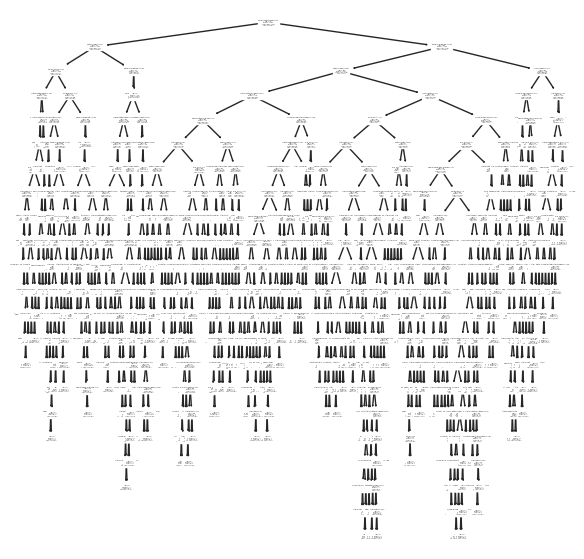

In [91]:
plt.figure(figsize=(7, 7))
plot_tree(modelTree1, feature_names= train_data[columnasModelo].columns, class_names=["no churn", "churn"])

In [92]:
#alta pureza en nuestro arbol de decision. Cada hoja alcanza a tener cero.

In [93]:
train_metrics_kn = train_data.copy()
train_metrics_kn["Preciction_tree1"] = modelTree1.predict(train_data[columnasModelo]) 

val_metrics_kn = val_data.copy()
val_metrics_kn["Preciction_tree1"] = modelTree1.predict(val_data[columnasModelo])



In [94]:
print("Training Metrics:")
print(classification_report(y_true=train_metrics_kn["Churn Label"], y_pred=train_metrics_kn["Preciction_tree1"]))

Training Metrics:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3622
         1.0       1.00      1.00      1.00      1308

    accuracy                           1.00      4930
   macro avg       1.00      1.00      1.00      4930
weighted avg       1.00      1.00      1.00      4930



In [95]:
print("Training Metrics:")
print(classification_report(y_true=val_metrics_kn["Churn Label"], y_pred=val_metrics_kn["Preciction_tree1"]))

Training Metrics:
              precision    recall  f1-score   support

         0.0       0.84      0.83      0.83       776
         1.0       0.54      0.56      0.55       280

    accuracy                           0.76      1056
   macro avg       0.69      0.69      0.69      1056
weighted avg       0.76      0.76      0.76      1056



[[642 134]
 [123 157]]


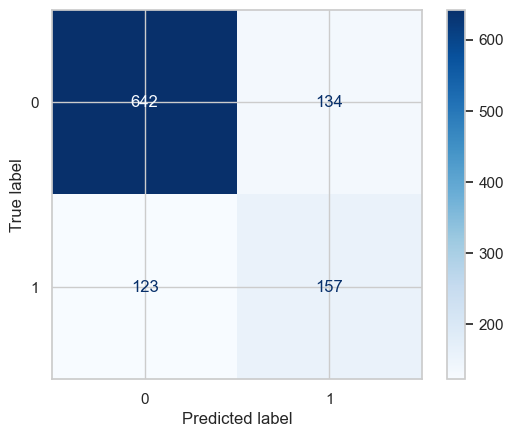

In [96]:

cm = confusion_matrix(val_metrics_kn["Churn Label"], val_metrics_kn["Preciction_tree1"])
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')  # Puedes cambiar la paleta de colores si prefieres
plt.show()

#### max_depth 5, class_weight balanced,min_samples_split=4, min_samples_leaf=2,

In [97]:
modelTree2 = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=4,
    min_samples_leaf=2,
    class_weight='balanced',
    random_state=42
)

In [98]:
modelTree2.fit(X = train_data[columnasModelo], y = train_data["Churn Label"])

DecisionTreeClassifier(class_weight='balanced', max_depth=5, min_samples_leaf=2,
                       min_samples_split=4, random_state=42)

In [99]:
train_metrics_kn["Preciction_tree2"] = modelTree2.predict(train_data[columnasModelo]) 
val_metrics_kn["Preciction_tree2"] = modelTree2.predict(val_data[columnasModelo])



In [100]:
print("Training Metrics:")
print(classification_report(y_true=train_metrics_kn["Churn Label"], y_pred=train_metrics_kn["Preciction_tree2"]))

Training Metrics:
              precision    recall  f1-score   support

         0.0       0.94      0.73      0.82      3622
         1.0       0.53      0.86      0.66      1308

    accuracy                           0.76      4930
   macro avg       0.73      0.80      0.74      4930
weighted avg       0.83      0.76      0.78      4930



In [101]:
print("Training Metrics:")
print(classification_report(y_true=val_metrics_kn["Churn Label"], y_pred=val_metrics_kn["Preciction_tree2"]))##Mejor modelo

Training Metrics:
              precision    recall  f1-score   support

         0.0       0.93      0.73      0.82       776
         1.0       0.53      0.85      0.65       280

    accuracy                           0.76      1056
   macro avg       0.73      0.79      0.73      1056
weighted avg       0.82      0.76      0.77      1056



[[565 211]
 [ 43 237]]


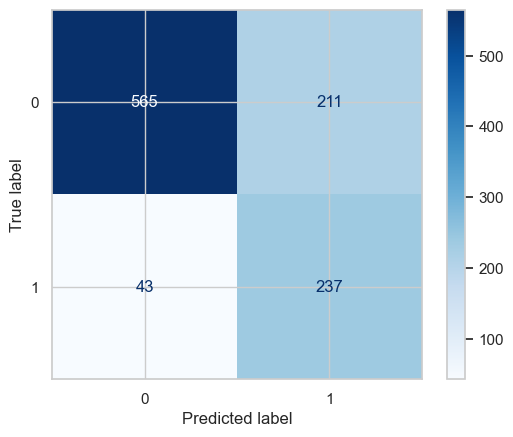

In [102]:
cm = confusion_matrix(val_metrics_kn["Churn Label"], val_metrics_kn["Preciction_tree2"])
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')  # Puedes cambiar la paleta de colores si prefieres
plt.show()

#### Con grid Search

In [103]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
}

In [104]:
grid_search_tree = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)

In [105]:
grid_search_tree.fit(train_data[columnasModelo],train_data["Churn Label"])

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10], 'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]})

In [106]:
bestTreeGrid = grid_search_tree.best_estimator_

In [107]:
print("Mejores parámetros encontrados:", bestTreeGrid)

Mejores parámetros encontrados: DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=10,
                       random_state=42)


In [108]:
train_metrics_kn["Preciction_tree3"] = bestTreeGrid.predict(train_data[columnasModelo]) 

val_metrics_kn["Preciction_tree3"] = bestTreeGrid.predict(val_data[columnasModelo])

In [109]:
print("Training Metrics:")
print(classification_report(y_true=train_metrics_kn["Churn Label"], y_pred=train_metrics_kn["Preciction_tree3"]))

Training Metrics:
              precision    recall  f1-score   support

         0.0       0.89      0.85      0.87      3622
         1.0       0.64      0.71      0.67      1308

    accuracy                           0.82      4930
   macro avg       0.76      0.78      0.77      4930
weighted avg       0.82      0.82      0.82      4930



In [110]:
print("Training Metrics:")
print(classification_report(y_true=val_metrics_kn["Churn Label"], y_pred=val_metrics_kn["Preciction_tree3"]))

Training Metrics:
              precision    recall  f1-score   support

         0.0       0.88      0.84      0.86       776
         1.0       0.60      0.68      0.64       280

    accuracy                           0.80      1056
   macro avg       0.74      0.76      0.75      1056
weighted avg       0.81      0.80      0.80      1056



[[649 127]
 [ 89 191]]


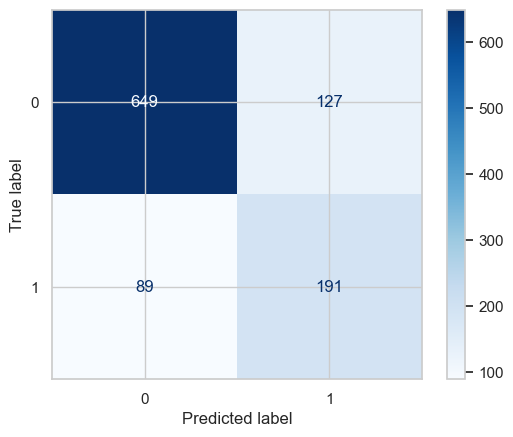

In [111]:
cm = confusion_matrix(val_metrics_kn["Churn Label"], val_metrics_kn["Preciction_tree3"])
print(cm)
# Graficar la matriz de confusión usando seaborn
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')  # Puedes cambiar la paleta de colores si prefieres
plt.show()

## KNN 

#### SIN GRID Y COLUMNAS FILTRADAS


In [112]:
KNclassifier1 = KNeighborsClassifier(n_neighbors=20)

In [113]:
KNclassifier1.fit(train_data[columnasModelo], train_data["Churn Label"])

KNeighborsClassifier(n_neighbors=20)

In [114]:
train_metrics_kn["Preciction_knn1"] = KNclassifier1.predict(train_data[columnasModelo]) 
val_metrics_kn["Preciction_knn1"] = KNclassifier1.predict(val_data[columnasModelo])



In [115]:
print("Training Metrics:")
print(classification_report(y_true=train_metrics_kn["Churn Label"], y_pred=train_metrics_kn["Preciction_knn1"]))

Training Metrics:
              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88      3622
         1.0       0.69      0.61      0.65      1308

    accuracy                           0.82      4930
   macro avg       0.78      0.75      0.76      4930
weighted avg       0.82      0.82      0.82      4930



In [116]:
print("Training Metrics:")
print(classification_report(y_true=val_metrics_kn["Churn Label"], y_pred=val_metrics_kn["Preciction_knn1"]))

Training Metrics:
              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88       776
         1.0       0.68      0.58      0.63       280

    accuracy                           0.82      1056
   macro avg       0.77      0.74      0.75      1056
weighted avg       0.81      0.82      0.81      1056



[[700  76]
 [117 163]]


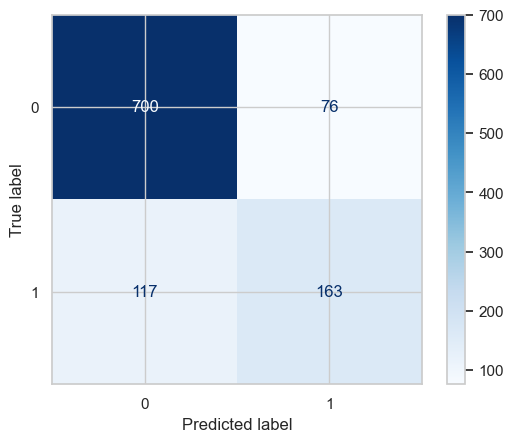

In [117]:
cm = confusion_matrix(val_metrics_kn["Churn Label"], val_metrics_kn["Preciction_knn1"])
print(cm)
# Graficar la matriz de confusión usando seaborn
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')  # Puedes cambiar la paleta de colores si prefieres
plt.show()

#### SIN GRID Y TODAS COLUMNAS

In [118]:
KNclassifier2 = KNeighborsClassifier(n_neighbors=20)

In [119]:
columnasSinChurn = ['Gender', 'Age', 'Married', 'Dependents', 'Number of Dependents',
       'Zip Code', 'Population', 'Referred a Friend', 'Number of Referrals',
       'Tenure in Months', 'Offer_No Offer', 'Offer_Offer E', 'Offer_Offer D',
       'Offer_Offer C', 'Offer_Offer B', 'Offer_Offer A', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type_DSL', 'Internet Type_Fiber Optic',
       'Internet Type_Cable', 'Internet Type_No Internet',
       'Avg Monthly GB Download', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data',
       'Contract_Month-to-Month', 'Contract_One Year', 'Contract_Two Year',
       'Paperless Billing', 'Payment Method_Bank Withdrawal',
       'Payment Method_Credit Card', 'Payment Method_Mailed Check',
       'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Age_cuartiles',
       ]

In [120]:
KNclassifier2.fit(X = train_data[columnasSinChurn], y = train_data["Churn Label"])

KNeighborsClassifier(n_neighbors=20)

In [121]:
train_metrics_kn["Preciction_knn2"] = KNclassifier2.predict(train_data[columnasSinChurn]) 

val_metrics_kn["Preciction_knn2"] = KNclassifier2.predict(val_data[columnasSinChurn])



In [122]:
print("Training Metrics:")
print(classification_report(y_true=train_metrics_kn["Churn Label"], y_pred=train_metrics_kn["Preciction_knn2"]))

Training Metrics:
              precision    recall  f1-score   support

         0.0       0.87      0.90      0.89      3622
         1.0       0.70      0.64      0.66      1308

    accuracy                           0.83      4930
   macro avg       0.78      0.77      0.78      4930
weighted avg       0.83      0.83      0.83      4930



In [123]:
print("Training Metrics:")
print(classification_report(y_true=val_metrics_kn["Churn Label"], y_pred=val_metrics_kn["Preciction_knn2"]))

Training Metrics:
              precision    recall  f1-score   support

         0.0       0.87      0.90      0.89       776
         1.0       0.70      0.63      0.66       280

    accuracy                           0.83      1056
   macro avg       0.79      0.77      0.77      1056
weighted avg       0.83      0.83      0.83      1056



[[701  75]
 [104 176]]


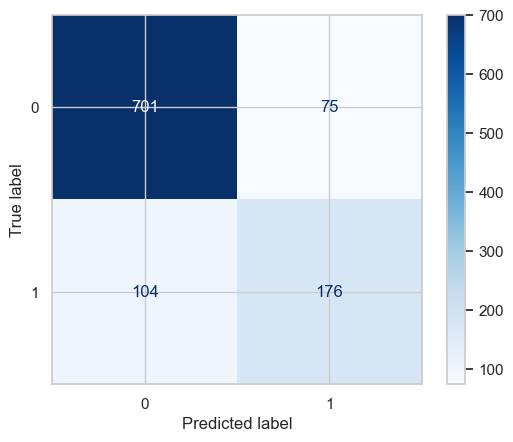

In [124]:
cm = confusion_matrix(val_metrics_kn["Churn Label"], val_metrics_kn["Preciction_knn2"])
print(cm)
# Graficar la matriz de confusión usando seaborn
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')  # Puedes cambiar la paleta de colores si prefieres
plt.show()

#### CON GRID Y COLUMNAS FILTRADAS


In [125]:
KNclassifierGrid = KNeighborsClassifier()

In [126]:
param_grid = {
    'n_neighbors': [5, 10, 15, 20],  # Puedes ajustar este rango según sea necesario
    'weights': ['uniform', 'distance'],  # Probar pesos uniformes y basados en la distancia
    'metric': ['euclidean', 'manhattan']  # Probar diferentes métricas de distancia
}

In [127]:
grid_search = GridSearchCV(
    estimator=KNclassifierGrid,
    param_grid=param_grid,
    cv=5, 
    scoring='accuracy')


In [128]:
grid_search.fit(X = train_data[columnasModelo], y = train_data["Churn Label"])

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [5, 10, 15, 20],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [129]:
bestKnnGrid = grid_search.best_estimator_

In [130]:
print("Mejores parámetros encontrados:", grid_search.best_params_)

Mejores parámetros encontrados: {'metric': 'manhattan', 'n_neighbors': 20, 'weights': 'uniform'}


In [131]:
train_metrics_kn["Preciction_knn3"] = bestKnnGrid.predict(train_data[columnasModelo]) 

val_metrics_kn["Preciction_knn3"] = bestKnnGrid.predict(val_data[columnasModelo])

In [132]:
print("Training Metrics:")
print(classification_report(y_true=train_metrics_kn["Churn Label"], y_pred=train_metrics_kn["Preciction_knn3"]))

Training Metrics:
              precision    recall  f1-score   support

         0.0       0.87      0.90      0.88      3622
         1.0       0.68      0.61      0.65      1308

    accuracy                           0.82      4930
   macro avg       0.77      0.75      0.76      4930
weighted avg       0.82      0.82      0.82      4930



In [133]:
print("Training Metrics:")
print(classification_report(y_true=val_metrics_kn["Churn Label"], y_pred=val_metrics_kn["Preciction_knn3"]))

Training Metrics:
              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88       776
         1.0       0.68      0.58      0.62       280

    accuracy                           0.81      1056
   macro avg       0.77      0.74      0.75      1056
weighted avg       0.81      0.81      0.81      1056



[[698  78]
 [118 162]]


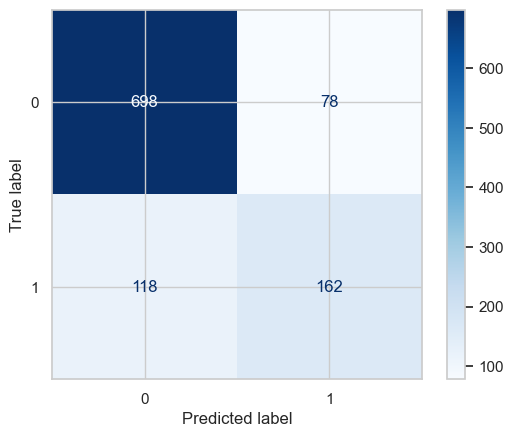

In [134]:
cm = confusion_matrix(val_metrics_kn["Churn Label"], val_metrics_kn["Preciction_knn3"])
print(cm)
# Graficar la matriz de confusión usando seaborn
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')  # Puedes cambiar la paleta de colores si prefieres
plt.show()

#### CON GRID Y COLUMNAS MÁS RELEVANTES

In [206]:
columnasRelevantes = [
    'Gender',  # El género podría estar relacionado con patrones de comportamiento de uso.
    'Age',  # La edad puede influir en el tipo de servicios contratados y la retención.
    'Married',  # Estado civil, tal vez relacionado con la estabilidad del cliente.
    'Tenure in Months',  # Antigüedad con la empresa, un factor clave para el churn.
    'Phone Service',  # Tener o no servicio telefónico puede ser un indicador de compromiso.
    'Avg Monthly Long Distance Charges',  # Cargos mensuales de larga distancia, podrían mostrar la dependencia del servicio.
    'Multiple Lines',  # Líneas múltiples pueden indicar mayor compromiso con los servicios.
    'Internet Service',  # Servicio de Internet como factor principal de retención.
    'Avg Monthly GB Download',  # Uso de datos, relacionado con la intensidad del uso de los servicios.
    'Online Security',  # Servicios adicionales que pueden influir en la lealtad del cliente.
    'Streaming TV',  # Servicios de entretenimiento también pueden afectar la retención.
    'Unlimited Data',  # Servicios de datos ilimitados pueden ser una ventaja competitiva.
    'Contract_Month-to-Month',  # Clientes con contratos mensuales suelen tener mayor probabilidad de irse.
    'Paperless Billing',  # Preferencia por facturación sin papel puede indicar un cliente más comprometido digitalmente.
    'Payment Method_Bank Withdrawal',  # Método de pago, algunos métodos pueden asociarse a mayor estabilidad.
    'Monthly Charge'  # El monto mensual podría ser un indicador de carga financiera.  # La satisfacción es un predictor directo de churn.

]

In [207]:
KNclassifierGrid2 = KNeighborsClassifier()

In [208]:
grid_search = GridSearchCV(estimator=KNclassifierGrid2, param_grid=param_grid, cv=5, scoring='accuracy')


In [209]:
grid_search.fit(X = train_data[columnasRelevantes], y = train_data["Churn Label"])

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [5, 10, 15, 20],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [210]:
bestKnnGrid = grid_search.best_estimator_

In [211]:
print("Mejores parámetros encontrados:", grid_search.best_params_)

Mejores parámetros encontrados: {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'}


In [212]:
train_metrics_kn["Preciction_knn4"] = bestKnnGrid.predict(train_data[columnasRelevantes]) 

val_metrics_kn["Preciction_knn4"] = bestKnnGrid.predict(val_data[columnasRelevantes])

In [213]:
print("Training Metrics:")
print(classification_report(y_true=train_metrics_kn["Churn Label"], y_pred=train_metrics_kn["Preciction_knn4"]))

Training Metrics:
              precision    recall  f1-score   support

         0.0       0.86      0.89      0.88      3622
         1.0       0.67      0.61      0.64      1308

    accuracy                           0.82      4930
   macro avg       0.77      0.75      0.76      4930
weighted avg       0.81      0.82      0.82      4930



In [214]:
print("Training Metrics:")
print(classification_report(y_true=val_metrics_kn["Churn Label"], y_pred=val_metrics_kn["Preciction_knn4"]))

Training Metrics:
              precision    recall  f1-score   support

         0.0       0.86      0.89      0.87       776
         1.0       0.66      0.60      0.63       280

    accuracy                           0.81      1056
   macro avg       0.76      0.74      0.75      1056
weighted avg       0.81      0.81      0.81      1056



[[688  88]
 [112 168]]


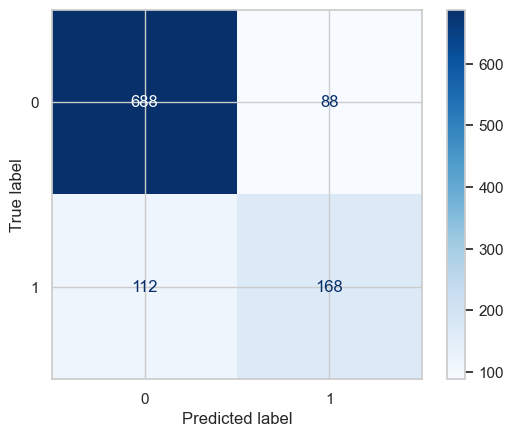

In [215]:
cm = confusion_matrix(val_metrics_kn["Churn Label"], val_metrics_kn["Preciction_knn4"])
print(cm)
# Graficar la matriz de confusión usando seaborn
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')  # Puedes cambiar la paleta de colores si prefieres
plt.show()

#### Verificar con el test

In [216]:
y_pred_test = bestKnnGrid.predict(test_data[columnasRelevantes])

In [217]:
print("Test Metrics:")
print(classification_report(test_data["Churn Label"], y_pred_test))

# Imprimir la matriz de confusión para el conjunto de test
print("Confusion Matrix - Test:")
print(confusion_matrix(test_data["Churn Label"], y_pred_test))

Test Metrics:
              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87       776
         1.0       0.65      0.58      0.61       281

    accuracy                           0.81      1057
   macro avg       0.75      0.73      0.74      1057
weighted avg       0.80      0.81      0.80      1057

Confusion Matrix - Test:
[[689  87]
 [118 163]]


In [147]:
### En todas las preccion es muy alta

## Regresion Logistica

In [148]:
## SHARON

In [154]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Crear y entrenar el modelo
regresion_logistica = LogisticRegression(penalty='l2', C=50, solver='lbfgs', max_iter=100, class_weight='balanced', multi_class='ovr')
regresion_logistica.fit(train_data[columnasModelo], train_data["Churn Label"])


C:\Users\micha\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=50, class_weight='balanced', multi_class='ovr')

In [155]:
# Realizar predicciones en el conjunto de entrenamiento
y_train_pred = regresion_logistica.predict(train_data[columnasModelo])

# Evaluar el modelo en el conjunto de entrenamiento
print("Accuracy en el conjunto de entrenamiento:", accuracy_score(train_data["Churn Label"], y_train_pred))
print("Classification Report:\n", classification_report(train_data["Churn Label"], y_train_pred))

Accuracy en el conjunto de entrenamiento: 0.7782961460446247
Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.75      0.83      3622
         1.0       0.55      0.85      0.67      1308

    accuracy                           0.78      4930
   macro avg       0.74      0.80      0.75      4930
weighted avg       0.83      0.78      0.79      4930



In [151]:
# Matriz de confusión
cm_train_log = confusion_matrix(train_data["Churn Label"], y_train_pred)
print("Matriz de confusión en el conjunto de entrenamiento:\n", cm_train_log)

Matriz de confusión en el conjunto de entrenamiento:
 [[3622    0]
 [   0 1308]]


In [156]:
# Realizar predicciones en el conjunto de validación
y_val_pred = regresion_logistica.predict(val_data[columnasModelo])


In [200]:
train_metrics_kn["Preciction_rl"] = regresion_logistica.predict(train_data[columnasModelo]) 

val_metrics_kn["Preciction_rl"] = regresion_logistica.predict(val_data[columnasModelo])

In [158]:

# Evaluar el modelo
print("Accuracy en el conjunto de validación:", accuracy_score(val_data["Churn Label"], y_val_pred))
print("Classification Report:\n", classification_report(val_data["Churn Label"], y_val_pred))

Accuracy en el conjunto de validación: 0.7831439393939394
Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.77      0.84       776
         1.0       0.56      0.83      0.67       280

    accuracy                           0.78      1056
   macro avg       0.74      0.80      0.75      1056
weighted avg       0.83      0.78      0.79      1056



In [160]:
# Matriz de confusión
cm_log = confusion_matrix(val_data["Churn Label"], y_val_pred)
print("Matriz de confusión validación:\n", cm_log)

Matriz de confusión validación:
 [[595 181]
 [ 48 232]]


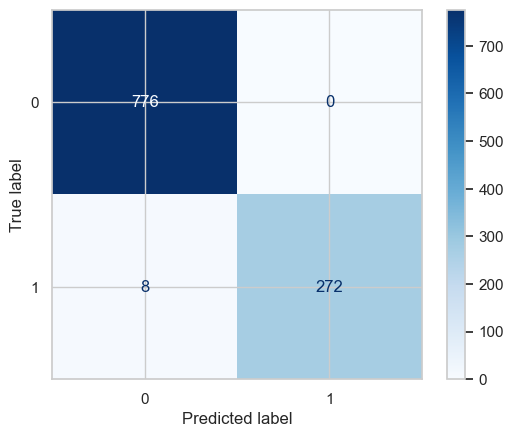

In [161]:
# Graficar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')  # Puedes cambiar la paleta de colores si prefieres
plt.show()

## SVC

In [162]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import metrics

In [163]:
#Excluir a Churn Label 

In [164]:
# Verificar características en X_train
print(f"Número de características en x_train: {train_data[columnasModelo].shape[1]}")

Número de características en x_train: 41


##### AJUSTES SENCILLOS

In [165]:
Modelo3SVC = SVC()

In [166]:
#Entrenando
Modelo3SVC.fit(train_data[columnasModelo], train_data["Churn Label"])

SVC()

In [167]:
y_pred_no_balance_train = Modelo3SVC.predict(train_data[columnasModelo])

In [168]:
print(classification_report(train_data["Churn Label"], y_pred_no_balance_train))

              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90      3622
         1.0       0.76      0.61      0.68      1308

    accuracy                           0.85      4930
   macro avg       0.81      0.77      0.79      4930
weighted avg       0.84      0.85      0.84      4930



In [169]:
#Predicción
y_pred_no_balance = Modelo3SVC.predict(val_data[columnasModelo])

In [170]:
print(classification_report(val_data["Churn Label"], y_pred_no_balance))

              precision    recall  f1-score   support

         0.0       0.87      0.92      0.89       776
         1.0       0.73      0.60      0.66       280

    accuracy                           0.84      1056
   macro avg       0.80      0.76      0.78      1056
weighted avg       0.83      0.84      0.83      1056



In [171]:
# Al tener un accuracy alto veamos si está prediciendo sobre la clase mayoritaria
class_data = train_data['Churn Label'].value_counts()
class_majority = class_data.idxmax()
print(f'La clase mayoritaria es: {class_majority}')

La clase mayoritaria es: 0.0


In [172]:
# Calcular el porcentaje de clase
class_percentage = train_data['Churn Label'].value_counts(normalize=True) * 100
print(class_percentage)

Churn Label
0.0    73.46856
1.0    26.53144
Name: proportion, dtype: float64


In [173]:
#Está prediciendo sobre la clase 0 que es que el cliente no abandona el servicio con un 73.46 %, mientras que la clase 
#minoritaria es 26.53%
# Con 100% de predicción, se muestra como un modelo perfecto; que no hay falsos positivos. Pero tiende a la confusión si 
# las predicciones positivas son bajas.
# Con un 24.91% el modelo no dectecto los falsos negativos porque tien un recall de 75% aprox.

##### RESCALAR LAS CLASES

In [174]:
#Creando pipeline
Modelo3SVC_ = make_pipeline(StandardScaler(), SVC(class_weight="balanced", gamma='auto'))

In [175]:
#Para el problema de desequilibrio se está usando "balanced" que calcula los pesos inversamente proporcionales a la frecuencia
#de la clase, de está forma no cambiamos el conjunto de datos lo que ajusta el balance de errores
#a diferencia del submuestreo
#de está forma debería mejorar su recall

In [176]:
#Ajustar el modelo al entrenamiento
Modelo3SVC_.fit(train_data[columnasModelo], train_data["Churn Label"])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(class_weight='balanced', gamma='auto'))])

In [177]:
y_pred = Modelo3SVC_.predict(train_data[columnasModelo])

In [201]:
train_metrics_kn["Preciction_svc"] = Modelo3SVC_.predict(train_data[columnasModelo]) 

val_metrics_kn["Preciction_svc"] = Modelo3SVC_.predict(val_data[columnasModelo])

In [178]:
print(classification_report(train_data["Churn Label"], y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.79      0.87      3622
         1.0       0.61      0.89      0.72      1308

    accuracy                           0.82      4930
   macro avg       0.78      0.84      0.79      4930
weighted avg       0.86      0.82      0.83      4930



In [179]:
#Predicción
y_pred_balance = Modelo3SVC_.predict(val_data[columnasModelo])

In [180]:
print(classification_report(val_data["Churn Label"], y_pred_balance))

              precision    recall  f1-score   support

         0.0       0.92      0.79      0.85       776
         1.0       0.58      0.81      0.68       280

    accuracy                           0.80      1056
   macro avg       0.75      0.80      0.76      1056
weighted avg       0.83      0.80      0.81      1056



In [ ]:
# 95.13% son las veces que el modelo indicará que el cliente abandonará el servicio, para los falsos positivos
# el modelo comete pocos errores

# 90.39% es capaz de identificar la mayoría de los clientes que abandonará el servicio.

# Lo que indica que no hay muchos errores en la clasificación, al tener una alta precisión se puede ofrecer a los clientes
# algún beneficio para que no abandonen
# Y un buen recall se tendrán resultados significativos que que clientes están en riesgo de abandonar el servicio lo que si
# me permite focalizar los esfuerzos que se tienen que hacer en la retención.

## Random Forest

In [ ]:
## Michael Poveda

#### Without grid and all columns

In [181]:
RandomForestModel1 = RandomForestClassifier()

In [182]:
RandomForestModel1.fit(train_data[columnasModelo], train_data["Churn Label"])

RandomForestClassifier()

In [183]:
train_metrics_kn["Preciction_rf1"] = RandomForestModel1.predict(train_data[columnasModelo]) 

val_metrics_kn["Preciction_rf1"] = RandomForestModel1.predict(val_data[columnasModelo])



In [184]:
print("Training Metrics:")
print(classification_report(y_true=train_metrics_kn["Churn Label"], y_pred=train_metrics_kn["Preciction_rf1"]))

Training Metrics:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3622
         1.0       1.00      1.00      1.00      1308

    accuracy                           1.00      4930
   macro avg       1.00      1.00      1.00      4930
weighted avg       1.00      1.00      1.00      4930



In [185]:
print("Training Metrics:")
print(classification_report(y_true=val_metrics_kn["Churn Label"], y_pred=val_metrics_kn["Preciction_rf1"]))

Training Metrics:
              precision    recall  f1-score   support

         0.0       0.86      0.91      0.88       776
         1.0       0.71      0.59      0.64       280

    accuracy                           0.83      1056
   macro avg       0.78      0.75      0.76      1056
weighted avg       0.82      0.83      0.82      1056



[[707  69]
 [115 165]]


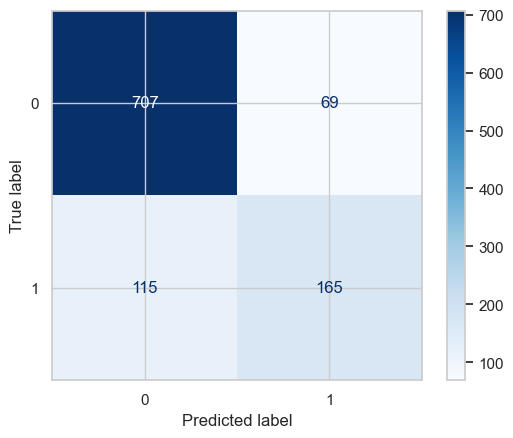

In [186]:
cm = confusion_matrix(val_metrics_kn["Churn Label"], val_metrics_kn["Preciction_rf1"])
print(cm)
# Graficar la matriz de confusión usando seaborn
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')  # Puedes cambiar la paleta de colores si prefieres
plt.show()

#### Random Forest Con grid

In [187]:
# Definir los parámetros para el GridSearch
param_grids = {
    'n_estimators': [100, 200, 300],  # Número de árboles en el bosque
    'max_depth': [10, 20, None],      # Profundidad máxima de los árboles
    'min_samples_split': [10, 30, 50, 100],  # Número mínimo de muestras para dividir un nodo
    'min_samples_leaf': [10, 30, 100]    # Número mínimo de muestras por nodo hoja
}


In [188]:
RandomForestModel1 = RandomForestClassifier(random_state = 42)

In [189]:
grid_search_rf = GridSearchCV(
    estimator = RandomForestModel1,
    param_grid = param_grids,
    cv=5,
    verbose=2, 
    n_jobs=-1)

In [190]:
grid_search_rf.fit(train_data[columnasModelo],train_data["Churn Label"])

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [10, 30, 100],
                         'min_samples_split': [10, 30, 50, 100],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [191]:
print("Mejores hiperparámetros encontrados:", grid_search_rf.best_params_)

Mejores hiperparámetros encontrados: {'max_depth': 20, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 300}


In [192]:
RandomForestModelGrid = grid_search_rf.best_estimator_

In [193]:
train_metrics_kn["Preciction_rf2"] = RandomForestModelGrid.predict(train_data[columnasModelo]) 

val_metrics_kn["Preciction_rf2"] = RandomForestModelGrid.predict(val_data[columnasModelo])



In [194]:
print("Training Metrics:")
print(classification_report(y_true=train_metrics_kn["Churn Label"], y_pred=train_metrics_kn["Preciction_rf2"]))

Training Metrics:
              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91      3622
         1.0       0.80      0.66      0.72      1308

    accuracy                           0.87      4930
   macro avg       0.84      0.80      0.82      4930
weighted avg       0.86      0.87      0.86      4930



In [195]:
print("Training Metrics:")
print(classification_report(y_true=val_metrics_kn["Churn Label"], y_pred=val_metrics_kn["Preciction_rf2"]))

Training Metrics:
              precision    recall  f1-score   support

         0.0       0.86      0.92      0.89       776
         1.0       0.74      0.59      0.65       280

    accuracy                           0.84      1056
   macro avg       0.80      0.76      0.77      1056
weighted avg       0.83      0.84      0.83      1056



[[717  59]
 [115 165]]


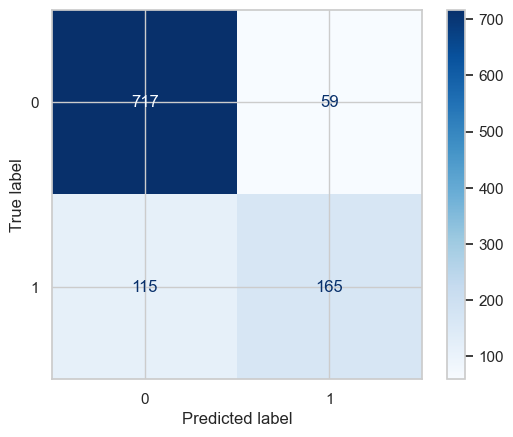

In [196]:
cm = confusion_matrix(val_metrics_kn["Churn Label"], val_metrics_kn["Preciction_rf2"])
print(cm)
# Graficar la matriz de confusión usando seaborn
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')  # Puedes cambiar la paleta de colores si prefieres
plt.show()

In [197]:
search_results = pd.DataFrame(grid_search_rf.cv_results_)

In [198]:
search_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.304051,0.105038,0.074330,0.014101,10,10,10,100,"{'max_depth': 10, 'min_samples_leaf': 10, 'min...",0.813387,0.826572,0.826572,0.817444,0.827586,0.822312,0.005787,6
1,3.913237,1.086324,0.127762,0.030342,10,10,10,200,"{'max_depth': 10, 'min_samples_leaf': 10, 'min...",0.815416,0.823529,0.828600,0.821501,0.822515,0.822312,0.004226,5
2,5.328801,1.590385,0.183176,0.031736,10,10,10,300,"{'max_depth': 10, 'min_samples_leaf': 10, 'min...",0.809331,0.823529,0.828600,0.818458,0.822515,0.820487,0.006446,31
3,1.475866,0.099664,0.071312,0.017947,10,10,30,100,"{'max_depth': 10, 'min_samples_leaf': 10, 'min...",0.813387,0.827586,0.830629,0.814402,0.820487,0.821298,0.006891,14
4,3.036894,0.737803,0.109917,0.012646,10,10,30,200,"{'max_depth': 10, 'min_samples_leaf': 10, 'min...",0.817444,0.822515,0.826572,0.817444,0.819473,0.820690,0.003478,27


# Val resume best Models

In [ ]:
#test_metrics_kn = test_data.copy()
#test_metrics_kn["PrecictionBestModel_Tree"] = grid_search_tree.predict(test_data[columnasModelo]) 

In [ ]:
#test_metrics_kn["PrecictionBestModel_Knn"] = bestKnnGrid.predict(test_data[columnasRelevantes])

In [ ]:
#test_metrics_kn["PrecictionBestModel_Regresion"] = regresion_logistica.predict(X_test)

In [ ]:
#test_metrics_kn["PrecictionBestModel_SVC"] = Modelo3SVC_.predict(X_test)

In [ ]:
#test_metrics_kn["PrecictionBestModel_RandomForest"] = RandomForestModelGrid.predict(test_data[columnasModelo])

In [218]:
print("Validation Metrics Decision Tree:")
print(classification_report(y_true=val_metrics_kn["Churn Label"], y_pred=val_metrics_kn["Preciction_tree3"]))

print("Validation Metrics Knn:")
print(classification_report(y_true=val_metrics_kn["Churn Label"], y_pred=val_metrics_kn["Preciction_knn3"]))

print("Validation Metrics Logistic Regresion:")
print(classification_report(y_true=val_metrics_kn["Churn Label"], y_pred=val_metrics_kn["Preciction_rl"]))

print("Validation Metrics SVC:")
print(classification_report(y_true=val_metrics_kn["Churn Label"], y_pred=val_metrics_kn["Preciction_svc"]))

print("Validation Metrics RandomForest:")
print(classification_report(y_true=val_metrics_kn["Churn Label"], y_pred=val_metrics_kn["Preciction_rf2"]))

Validation Metrics Decision Tree:
              precision    recall  f1-score   support

         0.0       0.88      0.84      0.86       776
         1.0       0.60      0.68      0.64       280

    accuracy                           0.80      1056
   macro avg       0.74      0.76      0.75      1056
weighted avg       0.81      0.80      0.80      1056

Validation Metrics Knn:
              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88       776
         1.0       0.68      0.58      0.62       280

    accuracy                           0.81      1056
   macro avg       0.77      0.74      0.75      1056
weighted avg       0.81      0.81      0.81      1056

Validation Metrics Logistic Regresion:
              precision    recall  f1-score   support

         0.0       0.93      0.77      0.84       776
         1.0       0.56      0.83      0.67       280

    accuracy                           0.78      1056
   macro avg       0.74      0.

In [204]:

test_metrics_kn = test_data.copy()
test_metrics_kn["PrecictionBestModel_Knn"] = bestKnnGrid.predict(test_data[columnasRelevantes])

In [205]:
print("Validation Metrics Knn:")
print(classification_report(y_true=test_metrics_kn["Churn Label"], y_pred=test_metrics_kn["PrecictionBestModel_Knn"]))

Validation Metrics Knn:
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       776
         1.0       1.00      0.95      0.97       281

    accuracy                           0.99      1057
   macro avg       0.99      0.98      0.98      1057
weighted avg       0.99      0.99      0.99      1057



# 7. Explainability

#### DecisionTree

In [219]:
explainer = shap.TreeExplainer(bestTreeGrid)

In [220]:
# Generar las explicaciones (SHAP values)
explanation = explainer(train_data[columnasModelo])#### SI se demora pueso usar el validacion


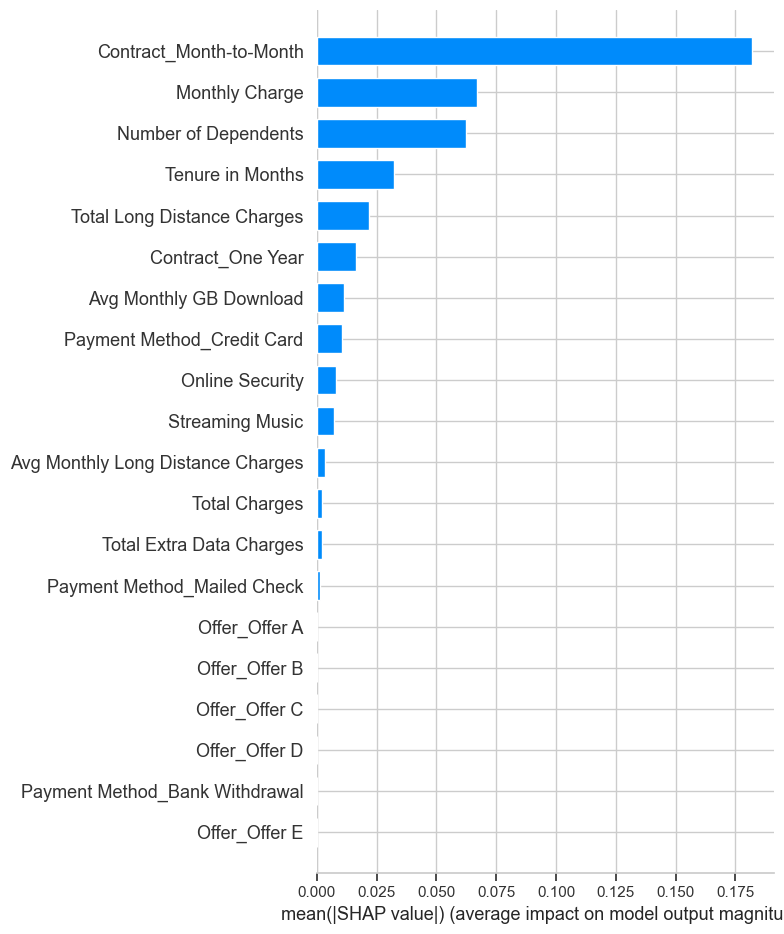

In [221]:
plt.figure(figsize=(20,8))
shap.summary_plot(explanation.values[:,:,1], features=train_data[columnasModelo], plot_type="bar")

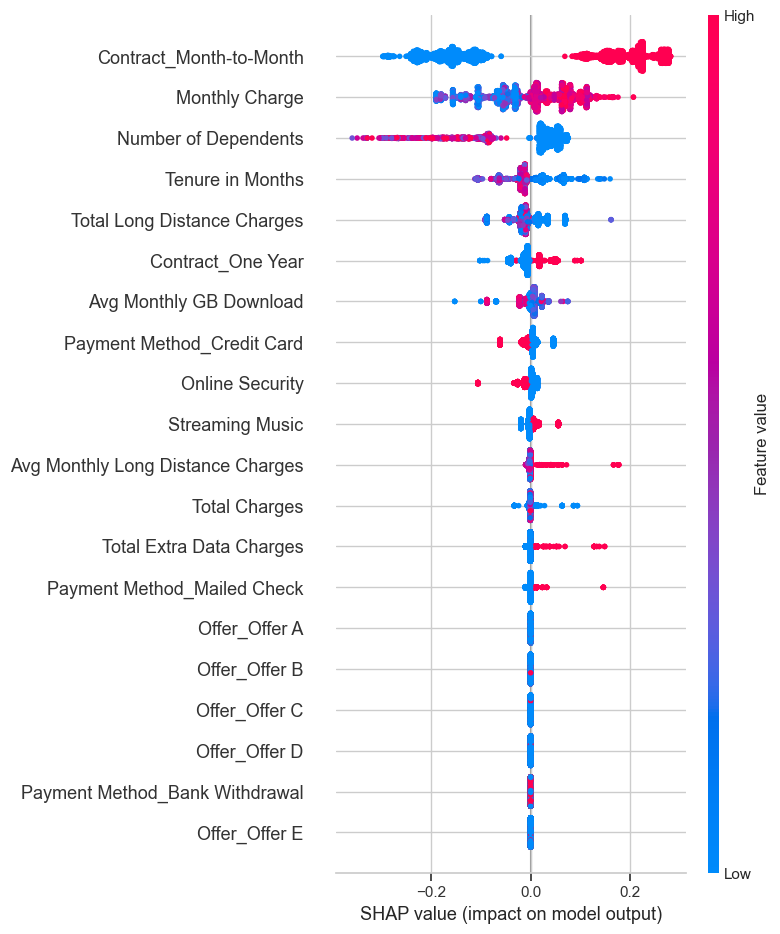

In [222]:
plt.figure(figsize=(20,8))
shap.summary_plot(explanation.values[:,:,1], features=train_data[columnasModelo])

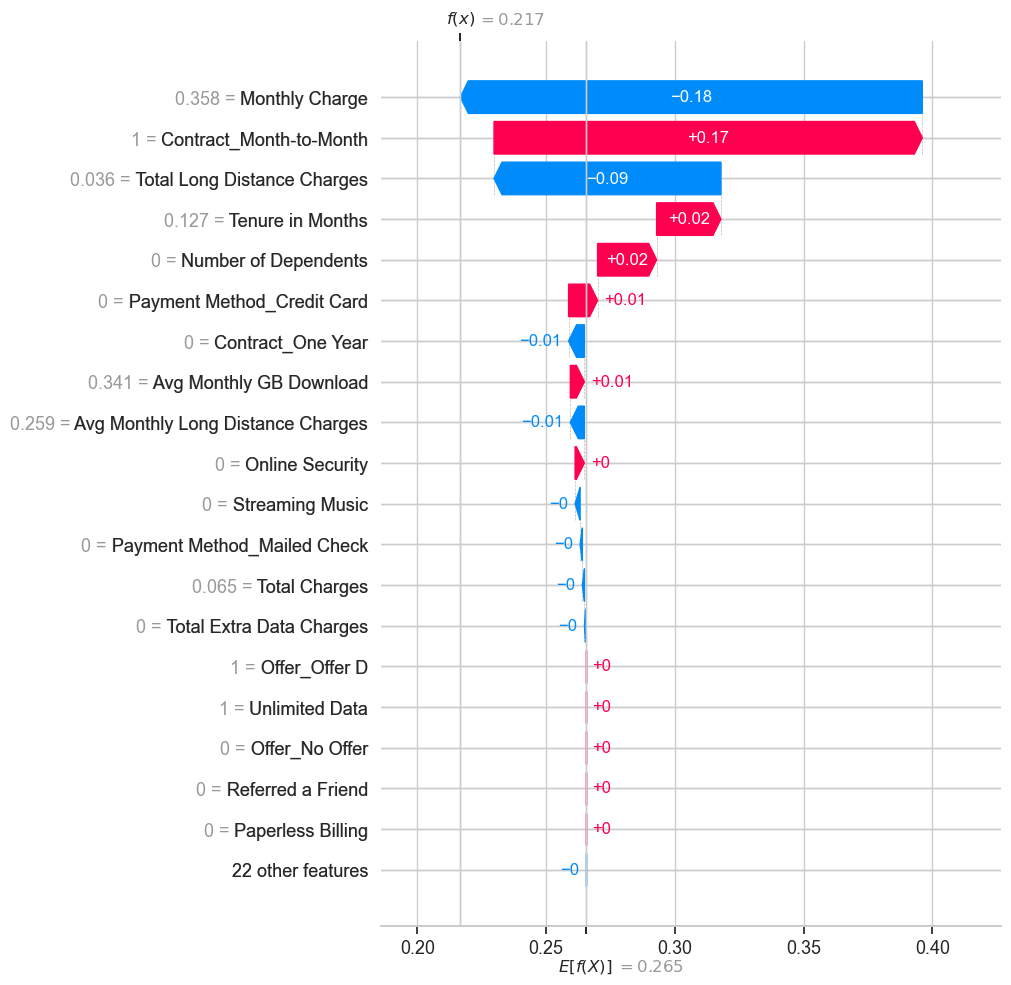

In [223]:
shap.plots.waterfall(explanation[6,:,1], max_display=20)

### RandomForestModelGrid

In [224]:
explainerRF = shap.TreeExplainer(RandomForestModelGrid)

In [ ]:
# Generar las explicaciones (SHAP values)
explanationRF = explainerRF(train_data[columnasModelo])#### SI se demora pueso usar el validacion


In [ ]:
plt.figure(figsize=(20,8))
shap.summary_plot(explanationRF.values[:,:,1], features=train_data[columnasModelo], plot_type="bar")

In [ ]:
plt.figure(figsize=(20,8))
shap.summary_plot(explanationRF.values[:,:,1], features=train_data[columnasModelo])

In [ ]:
shap.plots.waterfall(explanationRF[6,:,1], max_display=20)